The internet is all around us. How does it work? How do computers talk to each other?

The internet is all around us. How does it work? And how do computers manage to find each other and talk to each other? The goal of this article is to provide a gentle introduction to provide a foundation for some of the articles and research I am working on.

## The [OSI (*Open Systems Interconnection*) model](https://en.wikipedia.org/wiki/OSI_model)

The OSI model is a helpful abstraction to help break apart the entire concept of computer networks into smaller and simpler parts which are easier to understand.

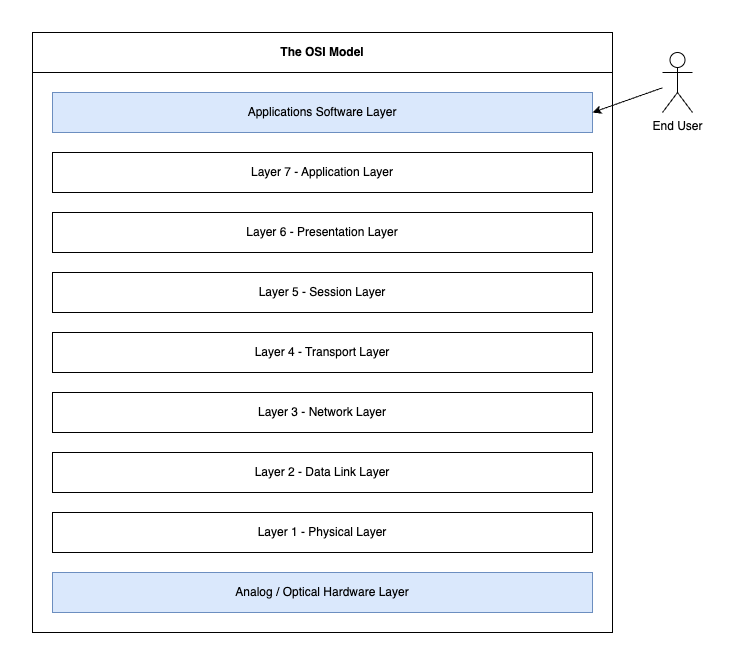

The goal of this article is to build an understanding of networks from the ground up.

## Layer 1 - Physical Layer

Imagine you're sending a secret message to a friend using a special code. Instead of writing out each letter, you use different shapes or colors to represent groups of letters or words. In data transmission, a "symbol" works similarly. Different physical layers will support different types of symbols. In electrical signals, it could be a voltage or a current. Or in an optical signal, it can be a pulse of light. Or in a sonic system, it could be the modulation of a pressure wave.

What makes the physical layer so hard to explain is that it could be any way of transmitting a signal.

Examples of the Physical Layer:

* **SPI, i2c, UART, etc.**: the digital voltage is used to represent a symbol. A high voltage signals a symbol of `1`, and a low voltage signals a symbol of `0`.
* **LVDS**: the current flowing through the differential pair represents a symbol.
* **Optical**: a flash of light could represent a symbol.
* **RF**: a pulse at a frequency (PM) could represent a symbol.

However, note that one symbol does not necessarily transport one bit. It could transport multiple bits of data. But how is that possible?

Let's think of the simplest type of single to work with - a voltage. This type of signal is commonly used by SPI, i2c, UART and other simple serial interfaces. Instead of having two states (on and off), what if we added more? Perhaps 4 voltages? $V_0, V_1, V_2, V_3$. Each voltage could be treated as a symbol. So how many bits can be transported here?

$$
\text{\# bits} = \log_2{(\text{\# symbols})}
$$
thus,
$$
\log_2{(4 \text{ symbols})} = 2\text{ bits}
$$

But where is this used in networks?

### Ethernet (802.3)**: Ethernet (over twisted pair) uses PAM

* [Fast ethernet (100mb): MLT-3 (multi-level transport-3)](https://en.wikipedia.org/wiki/MLT-3_encoding)
    * Each symbol is tristate $(-1, 0, 1)$. Each symbol carries one bit
    * $0$: is signalled by staying at the same symbol
    * $1$: is signalled by moving to the next symbol
    * The list of symbols in order that MLT-3 cycles is $(-1, 0, 1, 0)$ and it repeats.
* [Gigabit ethernet (1gbps): PAM-5 (pulse amplitude modulation-5)](https://www.5gtechnologyworld.com/how-does-4d-pam5-work-in-gigabit-ethernet/)
    * Each symbol has 5 states $(-2, -1, 0, 1, 2)$
    * Each symbol carries $\log_2{(5)} = 2.321\ \text{bits}$, leaving two bits of data transmission and extra data for **FEC** (forward error correction)
    * Due to the extra data from FEC, each 8 bits of data is transmitted as ${(5\text{ symbols})^{4\text{ symbols per byte}}=625\text{ possible states}}$ Since 8 bits corresponds to $(2\text{ states})^{8\text{ symbols}}=256\text{ possible states}$, we can detect and correct errors incurred during transmission.

### Radio / Audio


| Modulation Type  | What It Modifies | Example |
|-----------------|----------------|---------|
| **Amplitude Modulation (AM)** | Signal amplitude (height) | PAM, QAM |
| **Frequency Modulation (FM)** | Frequency of the wave | FSK (Frequency Shift Keying) |
| **Phase Modulation (PM)** | Phase of the wave | PSK (Phase Shift Keying) |


* With amplitude modulation, we can send multiple bits per symbol by transmitting different power levels per symbol, similar to PAM-5 in ethernet.
* With frequency modulation, we can send multiple bits per symbol by changing using different distinct frequencies for transmission.
* With phase modulation, we can send multiple bits per symbol by slicing the phase transitions into smaller steps
* With QAM (quadrature amplitude modulation), we are sending multiple bits by slicing up the amplitude as well as the phase transitions.

With 1024-QAM, that means $log_2(1024)=10\text{ bits}$ per symbol.

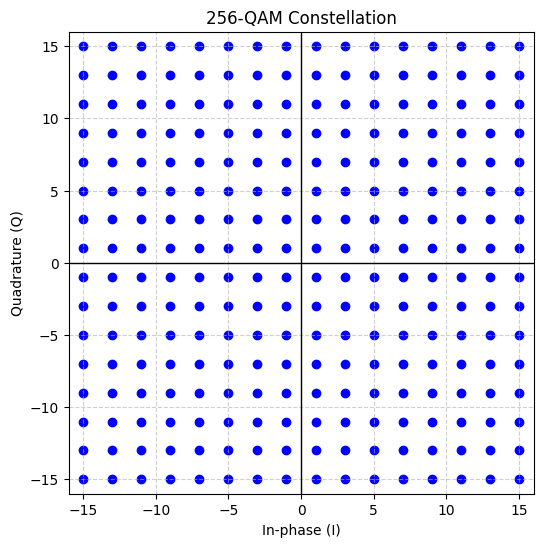

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate QAM constellation
def generate_qam_constellation(M):
    I = np.arange(-np.sqrt(M) + 1, np.sqrt(M), 2)
    Q = np.arange(-np.sqrt(M) + 1, np.sqrt(M), 2)

    I, Q = np.meshgrid(I, Q)
    return I.flatten(), Q.flatten()

M = 256  # 16-QAM
I, Q = generate_qam_constellation(M)

plt.figure(figsize=(6, 6))
plt.scatter(I, Q, color='blue', marker='o')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.title(f'{M}-QAM Constellation')
plt.xlabel('In-phase (I)')
plt.ylabel('Quadrature (Q)')
plt.xlim(-np.sqrt(M), np.sqrt(M))
plt.ylim(-np.sqrt(M), np.sqrt(M))
plt.show()